## **Instalación de Liberías**
Se necesitará usar la libería *chembl_webresource_client*, necesaria para poder acceder a la base de datos de ChEMBL desde Python. Es necesario hacer uso del caracter admiración para usar los comandos mágicos a través de la consola de Unix.

In [42]:
# instalar versión específica de itsdangerous para evitar conflictos
!pip install itsdangerous==2.1.2
!pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Importar las Librerías

In [205]:
import pandas as pd
from chembl_webresource_client.new_client import new_client
import numpy as np
import seaborn as sb
# visualizar datos extensión collab
#data_table.enable_dataframe_formatter()
from google.colab import data_table
data_table.disable_dataframe_formatter()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import warnings 
import re
import io
import matplotlib.cm as cm
from numpy import corrcoef, transpose, arange
from pylab import pcolor, show, colorbar, xticks, yticks
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

from numpy import corrcoef, transpose, arange

## **Base a utilizar: ChEMBL**
Se utilizarán datos recuperados de la base de datos ChEMBL. Para más información ver [*Base de Datos de ChEMBL*](https://www.ebi.ac.uk/chembl/)

Se busca en objetivos o 'targets' la primera enfermedad, en este caso será reutilizacion desde ChEMBL [*Query reutilizacion desde ChEMBL*](https://www.ebi.ac.uk/chembl/g/#search_results/targets/query=lymphoma)



Información recuperada el 15 de agosto de 2021.

In [206]:
activity_1 = new_client.activity
# res_ic50 = activity_1.filter(target_chembl_id = 'CHEMBL2366781').filter(standard_type="IC50") #CHEMBL4662926
# print(res_ic50)

import pandas as pd
#df_10 = pd.DataFrame.from_dict(res_ic50)

# from chembl_webresource_client.new_client import new_client

# mols = activity_1.filter(target_chembl_id__in=['CHEMBL368']).filter(standard_type="IC50").only(['assay_chembl_id', 'canonical_smiles', 'standard_value'])
# mols

# df_11 = pd.DataFrame.from_dict(mols)


activity = new_client.activity
res_ic50 = activity.filter(target_chembl_id__in = ['CHEMBL612883','CHEMBL612849','CHEMBL1075362','CHEMBL2366781','CHEMBL4296607','CHEMBL4879389',
                                                     'CHEMBL612851','CHEMBL613768','CHEMBL612348','CHEMBL1837','CHEMBL5131','CHEMBL3563','CHEMBL2601','CHEMBL5069',
                                                     'CHEMBL4188','CHEMBL3697','CHEMBL4386','CHEMBL4151','CHEMBL4752','CHEMBL4916','CHEMBL3328','CHEMBL5126',
                                                     'CHEMBL5154','CHEMBL5220','CHEMBL5228','CHEMBL5229','CHEMBL5686','CHEMBL5926','CHEMBL6134','CHEMBL5672',
                                                     'CHEMBL5832','CHEMBL5833','CHEMBL5834','CHEMBL1075110','CHEMBL1075156','CHEMBL1075193','CHEMBL1163130',
                                                     'CHEMBL1169595','CHEMBL1667688','CHEMBL1681621','CHEMBL1741167','CHEMBL1741201','CHEMBL1770043','CHEMBL2010636',
                                                     'CHEMBL2146303','CHEMBL2146316','CHEMBL2189141','CHEMBL2362982','CHEMBL2366047','CHEMBL3108659','CHEMBL3286069',
                                                     'CHEMBL3337328','CHEMBL3758065','CHEMBL3826861','CHEMBL3987581','CHEMBL3988589','CHEMBL3988596','CHEMBL4105902',
                                                     'CHEMBL4105928','CHEMBL4105987','CHEMBL4295536','CHEMBL4295594','CHEMBL4295599','CHEMBL4295600','CHEMBL4295601',
                                                     'CHEMBL4295602','CHEMBL4295611','CHEMBL4495551','CHEMBL4523319','CHEMBL4662925','CHEMBL4662926','CHEMBL4662930',
                                                     'CHEMBL4665581', 'CHEMBL2366686','CHEMBL4879388','CHEMBL612848','CHEMBL612878','CHEMBL367','CHEMBL612879',
                                                     'CHEMBL612880','CHEMBL612881','CHEMBL612651','CHEMBL612882','CHEMBL612241','CHEMBL613211','CHEMBL612790','CHEMBL612792',
                                                     'CHEMBL613213','CHEMBL612793','CHEMBL613215','CHEMBL612914','CHEMBL612915','CHEMBL4630669','CHEMBL4630671','CHEMBL613212',
                                                     'CHEMBL613214','CHEMBL612913','CHEMBL4137','CHEMBL4614','CHEMBL3186','CHEMBL3821','CHEMBL4418','CHEMBL4509','CHEMBL4751',
                                                     'CHEMBL3693','CHEMBL5149','CHEMBL5223','CHEMBL6192','CHEMBL6193','CHEMBL6194','CHEMBL1741202','CHEMBL1944500','CHEMBL1944501',
                                                     'CHEMBL1949483','CHEMBL2150832','CHEMBL2150834','CHEMBL2169723','CHEMBL2169733','CHEMBL2176840','CHEMBL2311227','CHEMBL2311240',
                                                     'CHEMBL3108635','CHEMBL3431938','CHEMBL4105741','CHEMBL4295531','CHEMBL4295561','CHEMBL4295583','CHEMBL4295843','CHEMBL4296305',
                                                     'CHEMBL4296319','CHEMBL4662923','CHEMBL4662927']).filter(standard_type="IC50").only(['assay_chembl_id', 'canonical_smiles', 'standard_value']) #'CHEMBL368' 'CHEMBL612877'
df = pd.DataFrame.from_dict(res_ic50)

df.shape
#df = pd.DataFrame.from_dict(res_ic50)

# activity_1 = new_client.activity
# #res_ic50 = activity_1.filter(target_chembl_id = 'CHEMBL2366781').filter(standard_type="IC50") #CHEMBL4662926

# #molecule = new_client.molecule
# res_ic50 = activity_1.filter(molecule_chembl_id__in=['CHEMBL612883','CHEMBL612849','CHEMBL368','CHEMBL1075362','CHEMBL2366781','CHEMBL4296607','CHEMBL4879389',
#                                                      'CHEMBL612851','CHEMBL613768','CHEMBL612348','CHEMBL1837','CHEMBL5131','CHEMBL3563','CHEMBL2601','CHEMBL5069',
#                                                      'CHEMBL4188','CHEMBL3697','CHEMBL4386','CHEMBL4151','CHEMBL4752','CHEMBL4916','CHEMBL3328','CHEMBL5126',
#                                                      'CHEMBL5154','CHEMBL5220','CHEMBL5228','CHEMBL5229','CHEMBL5686','CHEMBL5926','CHEMBL6134','CHEMBL5672',
#                                                      'CHEMBL5832','CHEMBL5833','CHEMBL5834','CHEMBL1075110','CHEMBL1075156','CHEMBL1075193','CHEMBL1163130',
#                                                      'CHEMBL1169595','CHEMBL1667688','CHEMBL1681621','CHEMBL1741167','CHEMBL1741201','CHEMBL1770043','CHEMBL2010636',
#                                                      'CHEMBL2146303','CHEMBL2146316','CHEMBL2189141','CHEMBL2362982','CHEMBL2366047','CHEMBL3108659','CHEMBL3286069',
#                                                      'CHEMBL3337328','CHEMBL3758065','CHEMBL3826861','CHEMBL3987581','CHEMBL3988589','CHEMBL3988596','CHEMBL4105902',
#                                                      'CHEMBL4105928','CHEMBL4105987','CHEMBL4295536','CHEMBL4295594','CHEMBL4295599','CHEMBL4295600','CHEMBL4295601',
#                                                      'CHEMBL4295602','CHEMBL4295611','CHEMBL4495551','CHEMBL4523319','CHEMBL4662925','CHEMBL4662926','CHEMBL4662930',
#                                                      'CHEMBL4665581', 'CHEMBL2366686','CHEMBL4879388','CHEMBL612848','CHEMBL612877','CHEMBL612878','CHEMBL367','CHEMBL612879',
#                                                      'CHEMBL612880','CHEMBL612881','CHEMBL612651','CHEMBL612882','CHEMBL612241','CHEMBL613211','CHEMBL612790','CHEMBL612792',
#                                                      'CHEMBL613213','CHEMBL612793','CHEMBL613215','CHEMBL612914','CHEMBL612915','CHEMBL4630669','CHEMBL4630671','CHEMBL613212',
#                                                      'CHEMBL613214','CHEMBL612913','CHEMBL4137','CHEMBL4614','CHEMBL3186','CHEMBL3821','CHEMBL4418','CHEMBL4509','CHEMBL4751',
#                                                      'CHEMBL3693','CHEMBL5149','CHEMBL5223','CHEMBL6192','CHEMBL6193','CHEMBL6194','CHEMBL1741202','CHEMBL1944500','CHEMBL1944501',
#                                                      'CHEMBL1949483','CHEMBL2150832','CHEMBL2150834','CHEMBL2169723','CHEMBL2169733','CHEMBL2176840','CHEMBL2311227','CHEMBL2311240',
#                                                      'CHEMBL3108635','CHEMBL3431938','CHEMBL4105741','CHEMBL4295531','CHEMBL4295561','CHEMBL4295583','CHEMBL4295843','CHEMBL4296305',
#                                                      'CHEMBL4296319','CHEMBL4662923','CHEMBL4662927']).filter(standard_type="IC50").only(['assay_chembl_id', 'canonical_smiles', 'standard_value'])
# res_ic50

# res_ic50 = pd.DataFrame.from_dict(res_ic50)

(40900, 4)

In [207]:
df.to_csv('df_final_prueba_1.csv')
df.shape
df.head()

,assay_chembl_id,canonical_smiles,standard_value,value
0,CHEMBL660279,C/C(=N\N=C(\N)S)c1ccc(Cl)c(Cl)c1,50.0,50.0
1,CHEMBL660279,C/C(=N\NC(N)=O)c1cccc(Cl)c1,10000.0,10.0
2,CHEMBL816826,Nc1ncnc2c1cnn2[C@@H]1C=C[C@@H](O)[C@H]1O,100000.0,100.0
3,CHEMBL817177,Nc1ncnc2c1cnn2[C@@H]1C=C[C@@H](O)[C@H]1O,100000.0,100.0
4,CHEMBL818007,Nc1ncnc2c1cnn2[C@@H]1C=C[C@@H](O)[C@H]1O,100000.0,100.0


In [210]:
print('Total registros: ', df.size, ' Dimension: ', df.shape)

Total registros:  163600  Dimension:  (40900, 4)


Se asigna la quinta entrada (que corresponde a la enfermedad objetivo) a la variable ***selected_target***

Se convierte el array **res_ic50** resultado del comando anterior  en *DataFrame* de Pandas 

Ver nombre de Columnas

In [211]:
# for col in df.columns:
#     print(col)
df.dtypes

assay_chembl_id     object
canonical_smiles    object
standard_value      object
value               object
dtype: object

## **Proceso KDD**
Se eliminan registros vacíos en la columna **standard_value** y **canonical_smiles**.

In [212]:
df = df.rename(columns={"assay_chembl_id": 'molecule_chembl_id'})
df.drop(columns={"value"})
df.shape
df

,molecule_chembl_id,canonical_smiles,standard_value,value
0,CHEMBL660279,C/C(=N\N=C(\N)S)c1ccc(Cl)c(Cl)c1,50.0,50.0
1,CHEMBL660279,C/C(=N\NC(N)=O)c1cccc(Cl)c1,10000.0,10.0
2,CHEMBL816826,Nc1ncnc2c1cnn2[C@@H]1C=C[C@@H](O)[C@H]1O,100000.0,100.0
3,CHEMBL817177,Nc1ncnc2c1cnn2[C@@H]1C=C[C@@H](O)[C@H]1O,100000.0,100.0
4,CHEMBL818007,Nc1ncnc2c1cnn2[C@@H]1C=C[C@@H](O)[C@H]1O,100000.0,100.0
...,...,...,...,...
40895,CHEMBL4840218,BrC1=NOC(c2ncc(-c3ccccc3)o2)C1,50700.0,50.7
40896,CHEMBL4840218,BrC1=NOC(c2nc(-c3ccccc3)cs2)C1,33800.0,33.8
40897,CHEMBL4840218,CC(C)(C)c1ccc(-c2nnc(C3CC(Br)=NO3)o2)cc1,7500.0,7.5
40898,CHEMBL4840218,CCN(CC)CCCC(C)Nc1ccnc2cc(Cl)ccc12,None,None


In [213]:
df = df[df.standard_value.notna()]
df = df[df.canonical_smiles.notna()]
df.shape

(37772, 4)

Se verifica la cantidad de registros únicos y luego se eliminan los duplicados

In [214]:
len(df.canonical_smiles.unique())
df2_kdd = df.drop_duplicates(['canonical_smiles'])
df2_kdd.drop(['value'], axis=1, inplace=True)
df2_kdd

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL660279,C/C(=N\N=C(\N)S)c1ccc(Cl)c(Cl)c1,50.0
1,CHEMBL660279,C/C(=N\NC(N)=O)c1cccc(Cl)c1,10000.0
2,CHEMBL816826,Nc1ncnc2c1cnn2[C@@H]1C=C[C@@H](O)[C@H]1O,100000.0
6,CHEMBL660279,CC/C(=N\N=C(/S)NC)c1cccc(Br)c1,10000.0
7,CHEMBL660279,S=C(Nc1cccc(Cl)c1)N1CCC(c2cccc(Br)c2)=N1,1000.0
...,...,...,...
40875,CHEMBL4840217,Oc1ccc(-c2noc(C3CC(Br)=NO3)n2)cc1,14700.0
40876,CHEMBL4840217,BrC1=NOC(c2nnc(-c3ccccc3)s2)C1,60300.0
40877,CHEMBL4840217,BrC1=NOC(c2nc(-c3ccccc3)cs2)C1,28800.0
40878,CHEMBL4840217,CC(C)(C)c1ccc(-c2nnc(C3CC(Br)=NO3)o2)cc1,3500.0


In [215]:
# df2_kdd.to_csv('matriz')
# df2_kdd.pchembl_value.fillna(value=np.nan, inplace=True)

# df2_kdd['pchembl_value'] = df2_kdd['pchembl_value'].fillna(0)
# df2_kdd['potential_duplicate'] = df2_kdd['potential_duplicate'].fillna(0)

# df2_kdd['document_year'] = df2_kdd['document_year'].fillna(2006)
# df2_kdd['potential_duplicate'] = df2_kdd['potential_duplicate'].fillna(0)
# df2_kdd['src_id'] = df2_kdd['src_id'].fillna(0)
# df2_kdd['standard_flag'] = df2_kdd['standard_flag'].fillna(0)
# df2_kdd['standard_value'] = df2_kdd['standard_value'].fillna(df2_kdd.mean())
# df2_kdd['value'] = df2_kdd['value'].fillna(df2_kdd.mean())

# #	df.fillna(df.mean())

# df2_kdd






#df2_kdd['pchembl_value'].fillna(df2_kdd['pchembl_value'].mean(), inplace=True)

## Análisis de correlación

In [ ]:
columnas = df2_kdd[ (df2_kdd.columns).drop(['canonical_smiles', 'assay_chembl_id', 'assay_type', 'assay_description', 'activity_properties', 'activity_comment', 'activity_comment', 'assay_variant_accession', 'assay_variant_mutation', 'bao_endpoint', 'bao_format', 'bao_label', 'data_validity_comment', 'data_validity_description', 'document_chembl_id', 'document_journal', 'ligand_efficiency', 'molecule_chembl_id', 'molecule_pref_name', 'parent_molecule_chembl_id', 'qudt_units', 'record_id', 'relation', 'standard_relation', 'standard_text_value', 'standard_type', 'standard_units', 'standard_upper_value', 'target_chembl_id', 'target_organism', 'target_pref_name', 'target_tax_id', 'text_value', 'toid', 'type', 'units', 'uo_units', 'upper_value']) ].columns #upper_value

df2_kdd[columnas].isnull().any()
#columnas.isnull().any()

dft = df2_kdd[columnas].T

names =  dft.index
names


#dft = dft.applymap(str)


# #https://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html
#R = corrcoef(dft)

# # http://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
# # Generate a mask for the upper triangle
# sns.set(style="white")
# mask = np.zeros_like(R, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True


# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(200, 10, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(R, mask=mask, cmap=cmap, vmax=.8,
#             square=True, xticklabels=names, yticklabels=names,
#             linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

Se unen las columnas más importantes en un solo dataset

In [216]:
select_col = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_kdd[select_col]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL660279,C/C(=N\N=C(\N)S)c1ccc(Cl)c(Cl)c1,50.0
1,CHEMBL660279,C/C(=N\NC(N)=O)c1cccc(Cl)c1,10000.0
2,CHEMBL816826,Nc1ncnc2c1cnn2[C@@H]1C=C[C@@H](O)[C@H]1O,100000.0
6,CHEMBL660279,CC/C(=N\N=C(/S)NC)c1cccc(Br)c1,10000.0
7,CHEMBL660279,S=C(Nc1cccc(Cl)c1)N1CCC(c2cccc(Br)c2)=N1,1000.0
...,...,...,...
40875,CHEMBL4840217,Oc1ccc(-c2noc(C3CC(Br)=NO3)n2)cc1,14700.0
40876,CHEMBL4840217,BrC1=NOC(c2nnc(-c3ccccc3)s2)C1,60300.0
40877,CHEMBL4840217,BrC1=NOC(c2nc(-c3ccccc3)cs2)C1,28800.0
40878,CHEMBL4840217,CC(C)(C)c1ccc(-c2nnc(C3CC(Br)=NO3)o2)cc1,3500.0


Ejemplo de verificación de diagrama de la segunda molécula

In [217]:
!pip install rdkit
from rdkit import Chem
molecula_0 = Chem.MolFromSmiles(df['canonical_smiles'][0])

print(df['canonical_smiles'][0])
molecula_0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached rdkit-2022.3.5-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (36.8 MB)


C/C(=N\N=C(\N)S)c1ccc(Cl)c(Cl)c1


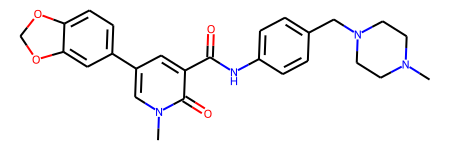

#Resetear índices

In [218]:
df3.reset_index()
df3.to_csv('reutilizacion_02_bioactivity_data_preprocessed_1.csv', index=False)

In [219]:
df4 = pd.read_csv('reutilizacion_02_bioactivity_data_preprocessed_1.csv')

### **Categorizar compuestos**
Los datos de bioactividad, consignados en la columna standard_value, están en unidades de IC50. Se clasifican estos valores en tres categorías. Los compuestos que tengan valores inferiores a 1.000 nM se considerarán **‘activos’**, Los valores entre 1.000 nM y 10.000 nM tendrán una categoría **‘NaN’** debido a que no se utilizarán, mientras que los valores superiores a 10.000 nM se considerarán **‘inactivos**’.

In [220]:
import numpy as np

df4['valor_bioactividad'] = ''
df4['valor_bioactividad'] = np.where(df4['standard_value'] >= 10000, 'inactivo', np.where(df4['standard_value'] <= 1000, 'activo','NA' ))
df4 = df4[(df4.valor_bioactividad == 'activo') | (df4.valor_bioactividad == 'inactivo')]
#reemplazar ceros con valor más pequeño
df4['standard_value'] = df4['standard_value'].replace(0.0, 0.06)
df4
#df4.drop(columns=['rango'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,molecule_chembl_id,canonical_smiles,standard_value,valor_bioactividad
0,CHEMBL660279,C/C(=N\N=C(\N)S)c1ccc(Cl)c(Cl)c1,50.0,activo
1,CHEMBL660279,C/C(=N\NC(N)=O)c1cccc(Cl)c1,10000.0,inactivo
2,CHEMBL816826,Nc1ncnc2c1cnn2[C@@H]1C=C[C@@H](O)[C@H]1O,100000.0,inactivo
3,CHEMBL660279,CC/C(=N\N=C(/S)NC)c1cccc(Br)c1,10000.0,inactivo
4,CHEMBL660279,S=C(Nc1cccc(Cl)c1)N1CCC(c2cccc(Br)c2)=N1,1000.0,activo
...,...,...,...,...
20164,CHEMBL4840217,Nc1ccc(-c2noc(C3CC(Br)=NO3)n2)cc1,28800.0,inactivo
20165,CHEMBL4840217,Oc1ccc(-c2noc(C3CC(Br)=NO3)n2)cc1,14700.0,inactivo
20166,CHEMBL4840217,BrC1=NOC(c2nnc(-c3ccccc3)s2)C1,60300.0,inactivo
20167,CHEMBL4840217,BrC1=NOC(c2nc(-c3ccccc3)cs2)C1,28800.0,inactivo


In [221]:
df.to_csv('reutilizacion_1.csv')

## Análisis de correlación

In [222]:
df4.to_csv('reutilizacion_03_bioactivity_data_curated_1.csv', index=False)

## PARTE 2: **Instalación de conda**

In [223]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2022-10-01 19:07:45--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’

Miniconda3-py37_4.8 100%[===================>]  81.12M  92.4MB/s    in 0.9s    

2022-10-01 19:07:46 (92.4 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: \ | / - \ | / - \ | / - \ | failed with initial frozen solve. Retrying with flexible solve.
Solving environment: - \ | / - \ | / - \ | / - failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: - \ | / - \ 

In [224]:
#@title
df = pd.read_csv('reutilizacion_03_bioactivity_data_curated_1.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,valor_bioactividad
0,CHEMBL660279,C/C(=N\N=C(\N)S)c1ccc(Cl)c(Cl)c1,50.0,activo
1,CHEMBL660279,C/C(=N\NC(N)=O)c1cccc(Cl)c1,10000.0,inactivo
2,CHEMBL816826,Nc1ncnc2c1cnn2[C@@H]1C=C[C@@H](O)[C@H]1O,100000.0,inactivo
3,CHEMBL660279,CC/C(=N\N=C(/S)NC)c1cccc(Br)c1,10000.0,inactivo
4,CHEMBL660279,S=C(Nc1cccc(Cl)c1)N1CCC(c2cccc(Br)c2)=N1,1000.0,activo
...,...,...,...,...
15055,CHEMBL4840217,Nc1ccc(-c2noc(C3CC(Br)=NO3)n2)cc1,28800.0,inactivo
15056,CHEMBL4840217,Oc1ccc(-c2noc(C3CC(Br)=NO3)n2)cc1,14700.0,inactivo
15057,CHEMBL4840217,BrC1=NOC(c2nnc(-c3ccccc3)s2)C1,60300.0,inactivo
15058,CHEMBL4840217,BrC1=NOC(c2nc(-c3ccccc3)cs2)C1,28800.0,inactivo


Eliminar columna *canonical_smiles*

In [225]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [226]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [227]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,valor_bioactividad,canonical_smiles
0,CHEMBL660279,50.0,activo,C/C(=N\N=C(\N)S)c1ccc(Cl)c(Cl)c1
1,CHEMBL660279,10000.0,inactivo,C/C(=N\NC(N)=O)c1cccc(Cl)c1
2,CHEMBL816826,100000.0,inactivo,Nc1ncnc2c1cnn2[C@@H]1C=C[C@@H](O)[C@H]1O
3,CHEMBL660279,10000.0,inactivo,CC/C(=N\N=C(/S)NC)c1cccc(Br)c1
4,CHEMBL660279,1000.0,activo,S=C(Nc1cccc(Cl)c1)N1CCC(c2cccc(Br)c2)=N1
...,...,...,...,...
15055,CHEMBL4840217,28800.0,inactivo,Nc1ccc(-c2noc(C3CC(Br)=NO3)n2)cc1
15056,CHEMBL4840217,14700.0,inactivo,Oc1ccc(-c2noc(C3CC(Br)=NO3)n2)cc1
15057,CHEMBL4840217,60300.0,inactivo,BrC1=NOC(c2nnc(-c3ccccc3)s2)C1
15058,CHEMBL4840217,28800.0,inactivo,BrC1=NOC(c2nc(-c3ccccc3)cs2)C1


Calcular descriptores de Lipinski
Christopher Lipinski, un científico de Pfizer, ideó un conjunto de reglas empíricas para evaluar la similitud de los compuestos con las drogas. Tal semejanza con las drogas se basa en la Absorción, Distribución, Metabolismo y Excreción (ADME), que también se conoce como perfil farmacocinético. Lipinski analizó todos los medicamentos activos por vía oral aprobados por la FDA en la formulación de lo que se conocerá como la regla de los cinco o la regla de Lipinski.

La Regla de Lipinski establecía lo siguiente:

Peso molecular < 500 Dalton
Coeficiente de reparto octanol-agua (LogP) < 5
Donantes de enlaces de hidrógeno < 5
Aceptores de enlaces de hidrógeno < 10

In [228]:
"""
Lipinski:
    Moleculer Weight <= 500
    LogP <= 5
    H-Bond Donor Count <= 5
    H-Bond Acceptor Count <= 10
"""

from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

Creación de la Función de Lipinski

In [229]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["Peso_Molecular","LogP","Num_Donadores_H","Num_Aceptores"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [230]:
df_clean_smiles.canonical_smiles

0                C/C(=N\N=C(\N)S)c1ccc(Cl)c(Cl)c1
1                     C/C(=N\NC(N)=O)c1cccc(Cl)c1
2        Nc1ncnc2c1cnn2[C@@H]1C=C[C@@H](O)[C@H]1O
3                  CC/C(=N\N=C(/S)NC)c1cccc(Br)c1
4        S=C(Nc1cccc(Cl)c1)N1CCC(c2cccc(Br)c2)=N1
                           ...                   
15055           Nc1ccc(-c2noc(C3CC(Br)=NO3)n2)cc1
15056           Oc1ccc(-c2noc(C3CC(Br)=NO3)n2)cc1
15057              BrC1=NOC(c2nnc(-c3ccccc3)s2)C1
15058              BrC1=NOC(c2nc(-c3ccccc3)cs2)C1
15059              BrC1=NOC(c2ncc(-c3ccccc3)o2)C1
Name: canonical_smiles, Length: 15060, dtype: object

In [231]:
df_lipinski = lipinski(df4.canonical_smiles)
df_lipinski

,Peso_Molecular,LogP,Num_Donadores_H,Num_Aceptores
0,262.165,2.9619,2.0,2.0
1,211.652,1.7323,2.0,2.0
2,233.231,-0.7588,3.0,7.0
3,300.225,3.0684,2.0,2.0
4,394.725,4.9093,1.0,2.0
...,...,...,...,...
15055,309.123,2.4886,1.0,6.0
15056,310.107,2.6120,1.0,6.0
15057,310.176,3.3749,0.0,5.0
15058,309.188,3.9799,0.0,4.0


### **Unión de datasets**

Se unen los datasets

In [232]:
df_combined = pd.concat([df_clean_smiles ,df_lipinski], axis=1)  #df_combined = pd.concat([df ,df_lipinski], axis=1) 
df_combined

,molecule_chembl_id,standard_value,valor_bioactividad,canonical_smiles,Peso_Molecular,LogP,Num_Donadores_H,Num_Aceptores
0,CHEMBL660279,50.0,activo,C/C(=N\N=C(\N)S)c1ccc(Cl)c(Cl)c1,262.165,2.9619,2.0,2.0
1,CHEMBL660279,10000.0,inactivo,C/C(=N\NC(N)=O)c1cccc(Cl)c1,211.652,1.7323,2.0,2.0
2,CHEMBL816826,100000.0,inactivo,Nc1ncnc2c1cnn2[C@@H]1C=C[C@@H](O)[C@H]1O,233.231,-0.7588,3.0,7.0
3,CHEMBL660279,10000.0,inactivo,CC/C(=N\N=C(/S)NC)c1cccc(Br)c1,300.225,3.0684,2.0,2.0
4,CHEMBL660279,1000.0,activo,S=C(Nc1cccc(Cl)c1)N1CCC(c2cccc(Br)c2)=N1,394.725,4.9093,1.0,2.0
...,...,...,...,...,...,...,...,...
15055,CHEMBL4840217,28800.0,inactivo,Nc1ccc(-c2noc(C3CC(Br)=NO3)n2)cc1,309.123,2.4886,1.0,6.0
15056,CHEMBL4840217,14700.0,inactivo,Oc1ccc(-c2noc(C3CC(Br)=NO3)n2)cc1,310.107,2.6120,1.0,6.0
15057,CHEMBL4840217,60300.0,inactivo,BrC1=NOC(c2nnc(-c3ccccc3)s2)C1,310.176,3.3749,0.0,5.0
15058,CHEMBL4840217,28800.0,inactivo,BrC1=NOC(c2nc(-c3ccccc3)cs2)C1,309.188,3.9799,0.0,4.0


### **Convertir IC50 a pIC50**
Para permitir que los datos de **IC50** se distribuyan de manera más uniforme, convertiremos **IC50** a la escala logarítmica negativa que es esencialmente **-log10(IC50)**.

Esta función pIC50() recibe el dataset como parámetro de entrada.
* Toma el valor de IC50 desde la columna ``standard_value`` y la convierte desde nM a M y luego multiplica el valor por 10$^{-9}$
* Toma el valor molar y luego aplica el -log10
* Se borra la columna ``standard_value`` y se reemplaza por la columna ``pIC50``

In [238]:
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_pic50']:
        molar = i*(10**-9)
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_pic50', 1)
        
    return x

In [239]:
df_combined.standard_value.describe()

count    1.506000e+04
mean     6.481524e+11
std      4.609668e+13
min      3.420000e-03
25%      8.100000e+01
50%      1.258925e+04
75%      5.000000e+04
max      5.011872e+15
Name: standard_value, dtype: float64

In [240]:
#Los valores superiores a 100 000 000 se fijarán en 100 000 000; de lo contrario, el valor logarítmico negativo se volverá negativo.
-np.log10( (10**-9)* 100000000 )
-np.log10( (10**-9)* 100000000 )

1.0

In [241]:
def normalizar_pic50(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_pic50'] = norm
    x = input.drop('standard_value', 1)
        
    return x

Primero aplicaremos la función norm_value() para que los valores en la columna standard_value se normalicen.

In [242]:
df_pic50 = normalizar_pic50(df_combined)
df_pic50

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.


,molecule_chembl_id,valor_bioactividad,canonical_smiles,Peso_Molecular,LogP,Num_Donadores_H,Num_Aceptores,standard_value_pic50
0,CHEMBL660279,activo,C/C(=N\N=C(\N)S)c1ccc(Cl)c(Cl)c1,262.165,2.9619,2.0,2.0,50.0
1,CHEMBL660279,inactivo,C/C(=N\NC(N)=O)c1cccc(Cl)c1,211.652,1.7323,2.0,2.0,10000.0
2,CHEMBL816826,inactivo,Nc1ncnc2c1cnn2[C@@H]1C=C[C@@H](O)[C@H]1O,233.231,-0.7588,3.0,7.0,100000.0
3,CHEMBL660279,inactivo,CC/C(=N\N=C(/S)NC)c1cccc(Br)c1,300.225,3.0684,2.0,2.0,10000.0
4,CHEMBL660279,activo,S=C(Nc1cccc(Cl)c1)N1CCC(c2cccc(Br)c2)=N1,394.725,4.9093,1.0,2.0,1000.0
...,...,...,...,...,...,...,...,...
15055,CHEMBL4840217,inactivo,Nc1ccc(-c2noc(C3CC(Br)=NO3)n2)cc1,309.123,2.4886,1.0,6.0,28800.0
15056,CHEMBL4840217,inactivo,Oc1ccc(-c2noc(C3CC(Br)=NO3)n2)cc1,310.107,2.6120,1.0,6.0,14700.0
15057,CHEMBL4840217,inactivo,BrC1=NOC(c2nnc(-c3ccccc3)s2)C1,310.176,3.3749,0.0,5.0,60300.0
15058,CHEMBL4840217,inactivo,BrC1=NOC(c2nc(-c3ccccc3)cs2)C1,309.188,3.9799,0.0,4.0,28800.0


In [243]:
df_pic50.standard_value_pic50.describe()

count    1.506000e+04
mean     1.936308e+05
std      3.656931e+06
min      3.420000e-03
25%      8.100000e+01
50%      1.258925e+04
75%      5.000000e+04
max      1.000000e+08
Name: standard_value_pic50, dtype: float64

In [244]:
df_final = pIC50(df_pic50)
df_final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if __name__ == '__main__':


,molecule_chembl_id,valor_bioactividad,canonical_smiles,Peso_Molecular,LogP,Num_Donadores_H,Num_Aceptores,pIC50
0,CHEMBL660279,activo,C/C(=N\N=C(\N)S)c1ccc(Cl)c(Cl)c1,262.165,2.9619,2.0,2.0,7.301030
1,CHEMBL660279,inactivo,C/C(=N\NC(N)=O)c1cccc(Cl)c1,211.652,1.7323,2.0,2.0,5.000000
2,CHEMBL816826,inactivo,Nc1ncnc2c1cnn2[C@@H]1C=C[C@@H](O)[C@H]1O,233.231,-0.7588,3.0,7.0,4.000000
3,CHEMBL660279,inactivo,CC/C(=N\N=C(/S)NC)c1cccc(Br)c1,300.225,3.0684,2.0,2.0,5.000000
4,CHEMBL660279,activo,S=C(Nc1cccc(Cl)c1)N1CCC(c2cccc(Br)c2)=N1,394.725,4.9093,1.0,2.0,6.000000
...,...,...,...,...,...,...,...,...
15055,CHEMBL4840217,inactivo,Nc1ccc(-c2noc(C3CC(Br)=NO3)n2)cc1,309.123,2.4886,1.0,6.0,4.540608
15056,CHEMBL4840217,inactivo,Oc1ccc(-c2noc(C3CC(Br)=NO3)n2)cc1,310.107,2.6120,1.0,6.0,4.832683
15057,CHEMBL4840217,inactivo,BrC1=NOC(c2nnc(-c3ccccc3)s2)C1,310.176,3.3749,0.0,5.0,4.219683
15058,CHEMBL4840217,inactivo,BrC1=NOC(c2nc(-c3ccccc3)cs2)C1,309.188,3.9799,0.0,4.0,4.540608


In [245]:
df_final.pIC50.describe()

count    15060.000000
mean         5.710570
std          1.771855
min          1.000000
25%          4.301030
50%          4.900000
75%          7.091515
max         11.465974
Name: pIC50, dtype: float64

In [247]:
df_final.to_csv('reutilizacion_04_bioactivity_data_3class_pIC50_1.csv')

### **Eliminar valores NaN de la columna valor_bioactividad**
Aquí, eliminaremos el valor ``NaN`` de nuestro conjunto de datos.

In [248]:
df2 = df_final.dropna()
df2.reset_index()
df2.to_csv('prueba_1.csv', index = False)
df2

,molecule_chembl_id,valor_bioactividad,canonical_smiles,Peso_Molecular,LogP,Num_Donadores_H,Num_Aceptores,pIC50
0,CHEMBL660279,activo,C/C(=N\N=C(\N)S)c1ccc(Cl)c(Cl)c1,262.165,2.9619,2.0,2.0,7.301030
1,CHEMBL660279,inactivo,C/C(=N\NC(N)=O)c1cccc(Cl)c1,211.652,1.7323,2.0,2.0,5.000000
2,CHEMBL816826,inactivo,Nc1ncnc2c1cnn2[C@@H]1C=C[C@@H](O)[C@H]1O,233.231,-0.7588,3.0,7.0,4.000000
3,CHEMBL660279,inactivo,CC/C(=N\N=C(/S)NC)c1cccc(Br)c1,300.225,3.0684,2.0,2.0,5.000000
4,CHEMBL660279,activo,S=C(Nc1cccc(Cl)c1)N1CCC(c2cccc(Br)c2)=N1,394.725,4.9093,1.0,2.0,6.000000
...,...,...,...,...,...,...,...,...
15055,CHEMBL4840217,inactivo,Nc1ccc(-c2noc(C3CC(Br)=NO3)n2)cc1,309.123,2.4886,1.0,6.0,4.540608
15056,CHEMBL4840217,inactivo,Oc1ccc(-c2noc(C3CC(Br)=NO3)n2)cc1,310.107,2.6120,1.0,6.0,4.832683
15057,CHEMBL4840217,inactivo,BrC1=NOC(c2nnc(-c3ccccc3)s2)C1,310.176,3.3749,0.0,5.0,4.219683
15058,CHEMBL4840217,inactivo,BrC1=NOC(c2nc(-c3ccccc3)cs2)C1,309.188,3.9799,0.0,4.0,4.540608


In [249]:
df2.to_csv('reutilizacion_05_bioactivity_data_2class_pIC50_1.csv')

## **Análisis de datos exploratorios (Análisis del espacio químico) a través del descriptor de Lipinski**

In [250]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Diagrama de frecuencias para las dos categorías**


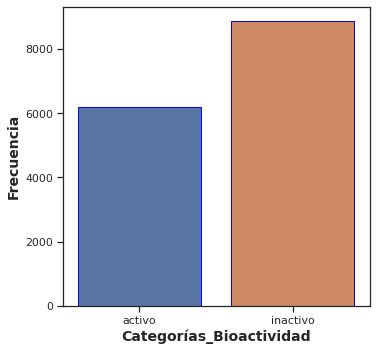

In [251]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='valor_bioactividad', data=df2, edgecolor='blue') #facecolor='blue'

plt.xlabel('Categorías_Bioactividad', fontsize=14, fontweight='bold')
plt.ylabel('Frecuencia', fontsize=14, fontweight='bold')

plt.savefig('grafica_categorias_bioactividad.pdf')

In [252]:
df2.groupby('valor_bioactividad').pIC50.count()


valor_bioactividad
activo      6191
inactivo    8869
Name: pIC50, dtype: int64

([<matplotlib.patches.Wedge at 0x7f1ba82768d0>,
 [Text(-0.30327453091660705, 1.0573668043291846, 'inactivo'),
  Text(0.30327443191878095, -1.0573668327237906, 'activo')],
 [Text(-0.16542247140905836, 0.5767455296341006, '58.9%'),
  Text(0.16542241741024413, -0.5767455451220675, '41.1%')])

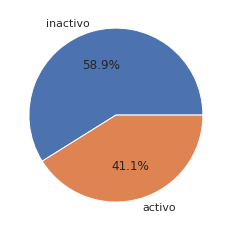

In [253]:
#Se construye un pie para establecer el porcentaje de cada catergoría en las clases 
#Se definen los totales para cada categoría 
inactive=8869
active=6191
conteos=[inactive,active]
clase=['inactivo','activo']
plt.pie(conteos,labels=clase,startangle=0,autopct='%1.1f%%')

### **Diagrama de puntos Peso_Molecular vs LogP**

Puede verse que las 2 categorías de bioactividad abarcan espacios químicos similares, como lo demuestra el diagrama de dispersión de Peso_Molecular frente a LogP.

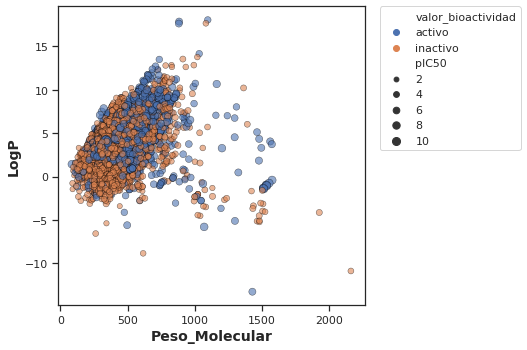

In [254]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='Peso_Molecular', y='LogP', data=df2, hue='valor_bioactividad', size='pIC50', edgecolor='black', alpha=0.6, facecolor = 'red')

plt.xlabel('Peso_Molecular', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_Peso_Molecular_vs_LogP.pdf')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


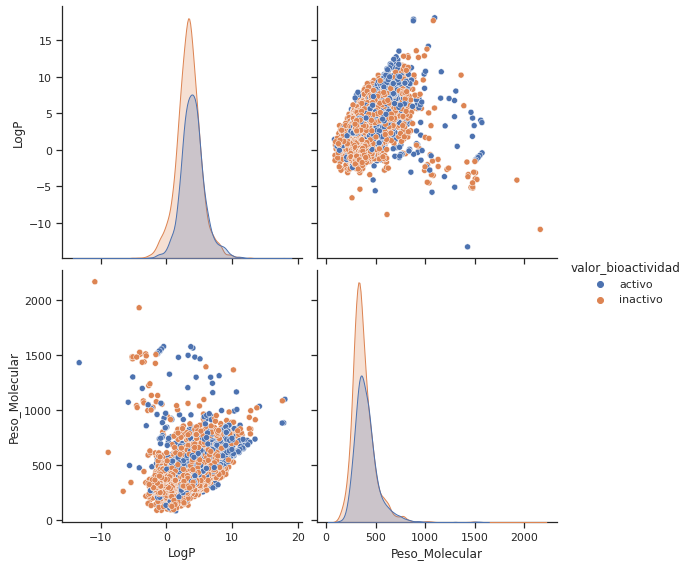

In [255]:
sb.pairplot(df2.dropna(),hue='valor_bioactividad',size=4,vars=["LogP","Peso_Molecular"],kind="scatter")

### **Box plots**
#### **PIC50**

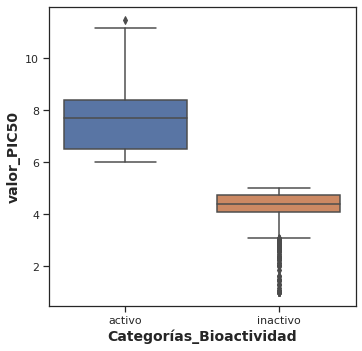

In [256]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'valor_bioactividad', y = 'pIC50', data = df2)

plt.xlabel('Categorías_Bioactividad', fontsize=14, fontweight='bold', )
plt.ylabel('valor_PIC50', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [257]:
#histogramas para la variable MW
#Ahora se procede a contruir los ejes
#número de breaks en el histograma
df_2_activo = df2[df2['valor_bioactividad']=='activo']
df_2_inactivo = df2[df2['valor_bioactividad']=='inactivo']

#### **Peso_Molecular**

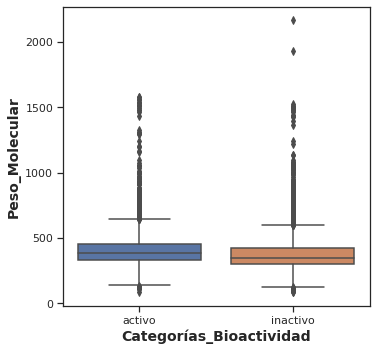

In [258]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'valor_bioactividad', y = 'Peso_Molecular', data = df2)

plt.xlabel('Categorías_Bioactividad', fontsize=14, fontweight='bold')
plt.ylabel('Peso_Molecular', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

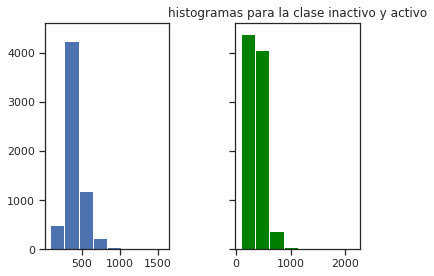

In [259]:
n_bins = 8
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
#gráfica del histograma usuarios activos
axs[0].hist(df_2_activo['Peso_Molecular'], bins=n_bins)
#gráfica del histograma usuarios inactivos
axs[1].hist(df_2_inactivo['Peso_Molecular'], bins=n_bins,color='green')
plt.title('histogramas para la clase inactivo y activo', loc='center')
plt.show()

#### **LogP**

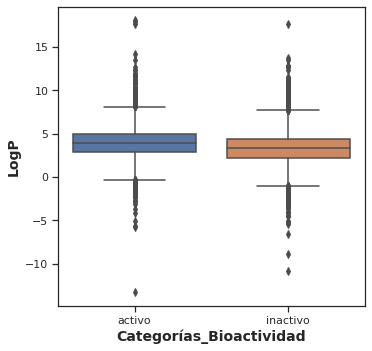

In [260]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'valor_bioactividad', y = 'LogP', data = df2)

plt.xlabel('Categorías_Bioactividad', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

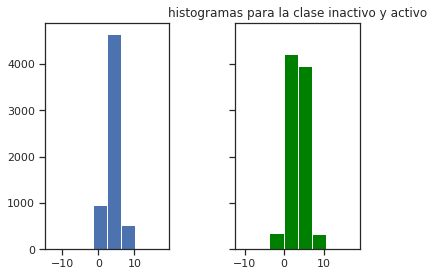

In [261]:
n_bins = 8
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
#gráfica del histograma usuarios activos
axs[0].hist(df_2_activo['LogP'], bins=n_bins)
#gráfica del histograma usuarios inactivos
axs[1].hist(df_2_inactivo['LogP'], bins=n_bins,color='green')
plt.title('histogramas para la clase inactivo y activo')
plt.show()

#### **Num_Donadores_Hidrógeno**

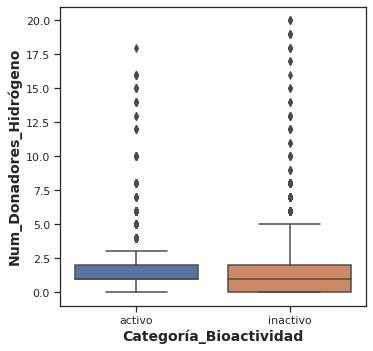

In [262]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'valor_bioactividad', y = 'Num_Donadores_H', data = df2)

plt.xlabel('Categoría_Bioactividad', fontsize=14, fontweight='bold')
plt.ylabel('Num_Donadores_Hidrógeno', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

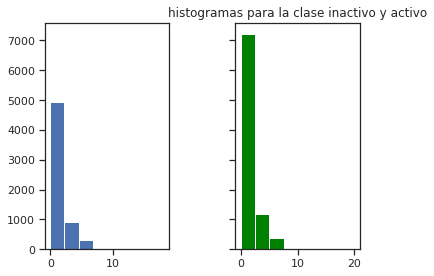

In [263]:
n_bins = 8
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
#gráfica del histograma usuarios activos
axs[0].hist(df_2_activo['Num_Donadores_H'], bins=n_bins)
#gráfica del histograma usuarios inactivos
axs[1].hist(df_2_inactivo['Num_Donadores_H'], bins=n_bins,color='green')
plt.title('histogramas para la clase inactivo y activo')
plt.show()

#### **Num_Aceptores**

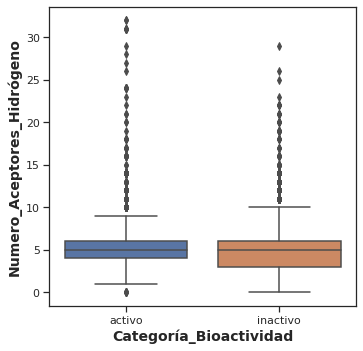

In [264]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'valor_bioactividad', y = 'Num_Aceptores', data = df2)

plt.xlabel('Categoría_Bioactividad', fontsize=14, fontweight='bold')
plt.ylabel('Numero_Aceptores_Hidrógeno', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

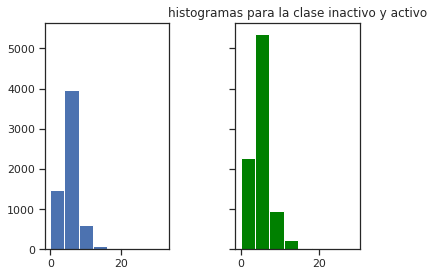

In [265]:
n_bins = 8
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
#gráfica del histograma usuarios activos
axs[0].hist(df_2_activo['Num_Aceptores'], bins=n_bins)
#gráfica del histograma usuarios inactivos
axs[1].hist(df_2_inactivo['Num_Aceptores'], bins=n_bins,color='green')
plt.title('histogramas para la clase inactivo y activo')
plt.show()

In [266]:
from rdkit.Chem import Descriptors
from rdkit.Chem import MolFromSmiles

mols = []

for i in df2.canonical_smiles:
        mol = MolFromSmiles(i)
        mols.append(mol)
        #print(df2)
ID = df2.molecule_chembl_id
STATUS = df2.valor_bioactividad
MW = [Descriptors.MolWt(n) for n in mols]
LogP = [Descriptors.MolLogP(o) for o in mols]
nHAcc = [Descriptors.NumHAcceptors(p) for p in mols]
nHDon = [Descriptors.NumHDonors(q) for q in mols]

data = pd.DataFrame(
    {'molecule_chembl_id': ID,
     'STATUS' : STATUS,
     'MW': MW, 
     'LogP': LogP,
     'nHAcc': nHAcc,
     'nHDon': nHDon
    })
data = data[['molecule_chembl_id','STATUS','MW','LogP','nHAcc','nHDon']]


In [267]:
df2.head(1)

,molecule_chembl_id,valor_bioactividad,canonical_smiles,Peso_Molecular,LogP,Num_Donadores_H,Num_Aceptores,pIC50
0,CHEMBL660279,activo,C/C(=N\N=C(\N)S)c1ccc(Cl)c(Cl)c1,262.165,2.9619,2.0,2.0,7.30103


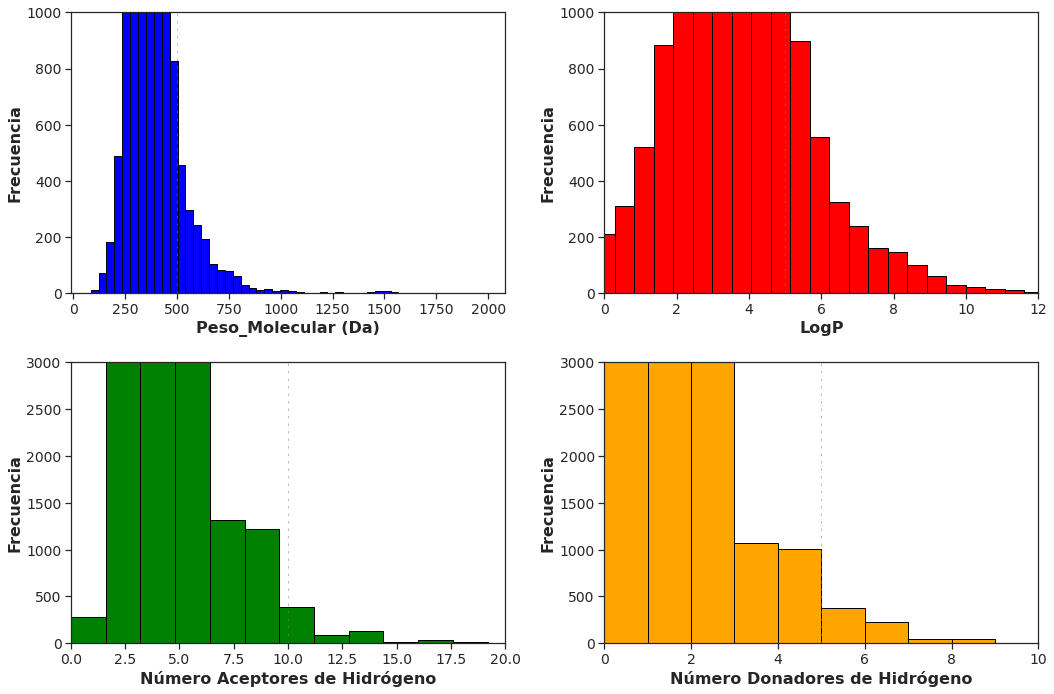

In [268]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

figure, ((plt1,plt2), (plt3,plt4)) = plt.subplots(2, 2)
figure.set_size_inches(15,10)

# Histograma para MW
hist, bins = np.histogram(MW, 50)
width = 1 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt1.bar(center, hist, align='center', width=width, color='blue',edgecolor='black',\
         error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2,linestyle='-', linewidth=0.5))
plt1.set_xlabel('Peso_Molecular (Da)', fontsize=16, fontweight='bold')
plt1.set_ylabel('Frecuencia', fontsize=16, fontweight='bold')
plt1.tick_params(axis='both', which='major', labelsize=14)
#plt1.set_xlim(200,900)
plt1.set_ylim(0, 1000)
#plt1.grid(True)
plt1.axvline(500, color='gray',linestyle='--', dashes=(5, 10), linewidth=0.5)

# Histograma para LogP
hist, bins = np.histogram(LogP, 50)
width = 1 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt2.bar(center, hist, align='center', width=width, color='red',edgecolor='black',\
         error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2,linestyle='-', linewidth=0.5))
plt2.set_xlabel('LogP', fontsize=16, fontweight='bold')
plt2.set_ylabel('Frecuencia', fontsize=16, fontweight='bold')
plt2.tick_params(axis='both', which='major', labelsize=14)
plt2.set_xlim(0,12)
plt2.set_ylim(0,1000)
plt2.axvline(5, color='gray',linestyle='--', dashes=(5, 10), linewidth=0.5)

# Histograma para nHDon
hist, bins = np.histogram(nHDon, 20)
width = 1 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt4.bar(center, hist, align='center', width=width, color='orange',edgecolor='black',\
         error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2, linestyle='-', linewidth=0.5))
plt4.set_xlabel('Número Donadores de Hidrógeno', fontsize=16, fontweight='bold')
plt4.set_ylabel('Frecuencia', fontsize=16, fontweight='bold')
plt4.tick_params(axis='both', which='major', labelsize=14)
plt4.set_xlim(0,10)
plt4.set_ylim(0,3000)
#plt4.grid(True)
plt4.axvline(5, color='gray',linestyle='--', dashes=(5, 10), linewidth=0.5)

# Histograma para nHAcc
hist, bins = np.histogram(nHAcc, 20)
width = 1 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt3.bar(center, hist, align='center', width=width, color='green',edgecolor='black',\
         error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2, linestyle='-', linewidth=0.5))
plt3.set_xlabel('Número Aceptores de Hidrógeno', fontsize=16, fontweight='bold')
plt3.set_ylabel('Frecuencia', fontsize=16, fontweight='bold')
plt3.tick_params(axis='both', which='major', labelsize=14)
plt3.set_xlim(0,20)
plt3.set_ylim(0,3000)
#plt3.grid(True)
plt3.axvline(10, color='gray',linestyle='--', dashes=(5, 10), linewidth=0.5)

plt.tight_layout(pad=2.0, w_pad=2.0, h_pad=2.0)

In [269]:
from rdkit.Chem import Descriptors
from rdkit.Chem import MolFromSmiles

ID = df2.molecule_chembl_id
STATUS = df2.valor_bioactividad

mols = []

for i in df2.canonical_smiles:
        mol = MolFromSmiles(i)
        mols.append(mol)
MW = [Descriptors.MolWt(n) for n in mols]
LogP = [Descriptors.MolLogP(o) for o in mols]
nHAcc = [Descriptors.NumHAcceptors(p) for p in mols]
nHDon = [Descriptors.NumHDonors(q) for q in mols]

print(nHDon)

data = pd.DataFrame(
    {'molecule_chembl_id': ID,
     'valor_bioactividad' : STATUS,
     'Peso_Molecular': MW, 
     'LogP': LogP,
     'Num_Aceptores': nHAcc,
     'Num_Donadores_H': nHDon
    })
#data = data[['molecule_chembl_id','valor_bioactividad','MW','LogP','nHAcc','nHDon']]


#data.to_csv('SubFiles/ER_alpha_train_RO5.csv', sep=',' ,index=False)

[2, 2, 3, 2, 1, 3, 3, 2, 2, 3, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 4, 2, 2, 2, 1, 1, 2, 2, 2, 2, 3, 3, 2, 2, 4, 2, 2, 2, 2, 3, 3, 2, 2, 2, 4, 2, 2, 2, 2, 3, 2, 1, 2, 2, 2, 2, 1, 0, 0, 4, 0, 0, 0, 0, 3, 0, 0, 3, 4, 0, 4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 3, 0, 4, 4, 0, 4, 0, 0, 0, 4, 3, 5, 4, 2, 4, 5, 5, 4, 4, 0, 2, 4, 4, 5, 2, 1, 4, 5, 4, 4, 4, 5, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 4, 4, 5, 3, 6, 4, 6, 3, 6, 3, 2, 4, 4, 7, 2, 0, 1, 5, 0, 4, 3, 6, 7, 4, 4, 4, 7, 4, 5, 4, 4, 2, 6, 5, 2, 5, 6, 2, 4, 7, 5, 0, 6, 3, 2, 0, 0, 7, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 6, 5, 3, 4, 4, 5, 4, 4, 4, 4, 4, 4, 5, 3, 4, 5, 4, 3, 4, 4, 4, 4, 3, 4, 5, 4, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 12, 1, 0, 1, 1, 1, 0, 1, 1, 1, 5, 5, 1, 3, 0, 1, 0, 0, 1, 2, 1, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 5, 0, 0, 4, 3, 0, 3, 6, 0, 1, 5, 0, 2, 0, 0, 5, 5, 5, 0, 0, 1, 0, 0, 2, 1, 2, 1, 2,

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/dis

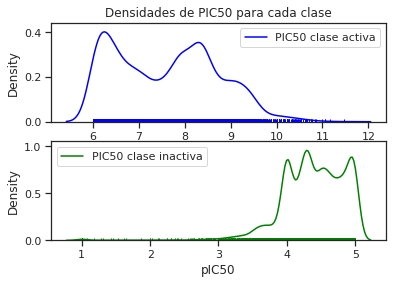

In [270]:
#Gráficas de densidad para cada medición PIC50 (Estimación Kernel)
plt.figure()
plt.subplot(2, 1,1)
plt.title('Densidades de PIC50 para cada clase')
ax = sns.distplot(df_2_activo['pIC50'], rug=True, hist=False,label='PIC50 clase activa',color='blue')
plt.legend()
plt.subplot(2, 1,2)
ax = sns.distplot(df_2_inactivo['pIC50'], rug=True, hist=False,label='PIC50 clase inactiva',color='green')
plt.legend()
plt.show()

## Análisis inferencial

En esta sección se van a analizar inferencialmnete  a la variable *PIC50* para la clase activo e inactivo. Por lo tanto, se cargan las siguientes librerías



In [271]:
#Se carga las librerías requeridas 
import statsmodels.api as sm
from scipy import stats


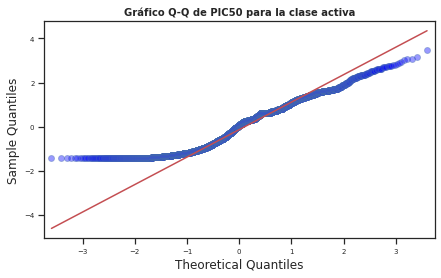

In [272]:
#Se va a construir los QQ-plot para  'PIC50' en cada una de las  clases
#Esto se hace con el objetivo de analizar si los cuantiles teóricos ccoinciden con los cuantiles muestrales 
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(df_2_activo['pIC50'],fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q de PIC50 para la clase activa', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

Antes de empezar con un resultado formal, s epuede analizar el QQ-plot para 
analizar si los cuantiles o percentiles muestrales coinciden con los cuantiles teóricos de la distribución normal 

Se puede apreciar que  empíricamente los cuantiles muestrales de **PIC50** de la clase **activa** no se ajustan bien a los cuantiles teóricos de la distribución normal 

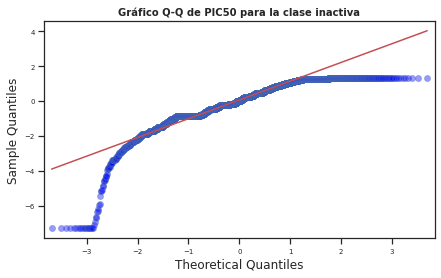

In [273]:
#Se va a construir los QQ-plot para  'PIC50' en cada una de las  clases
#Esto se hace con el objetivo de analizar si los cuantiles teóricos ccoinciden con los cuantiles muestrales 
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(df_2_inactivo['pIC50'],fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.set_title('Gráfico Q-Q de PIC50 para la clase inactiva', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)

Se puede apreciar que  empíricamente los cuantiles muestrales de **PIC50** de la clase **inactiva** no se ajustan bien a los cuantiles teóricos de la distribución normal 

In [274]:
# Test de Shapiro-Wilk  (clase activa)
# ==============================================================================
shapiro_test = stats.shapiro(df_2_activo['pIC50'])
shapiro_test

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9512239098548889, pvalue=3.0615568848568603e-41)

En este caso el $$p-valor=8.68832989120154*10^{-27}$$ 
Luego, a un nivel de significancia de $$\alpha=0.05$$
Se tiene que: $$p-valor=8.68832989120154*10^{-27}<0.05=\alpha$$
Por lo tanto, se rechaza la hipótesis  nula. Es decir, que como se había apreciada empíricamente la muestra no viene de una población con distribución normal. Por lo tanto, existe evidencia estadística para deducir que la variable **PIC50** de la clase activa no tiene una distribución normal.

**Mann-Whitney U Test**

In [275]:
# Test de Shapiro-Wilk  (clase inactiva)
# ==============================================================================
shapiro_test = stats.shapiro(df_2_inactivo['pIC50'])
shapiro_test

ShapiroResult(statistic=0.8935219049453735, pvalue=0.0)

En este caso el $$p-valor=1.5192948015132883*10^{-39}$$ 
Luego, a un nivel de significancia de $$\alpha=0.05$$
Se tiene que: $$p-valor=1.5192948015132883*10^{-39}<0.05=\alpha$$
Por lo tanto, se rechaza la hipótesis  nula. Es decir, que como se había apreciada empíricamente la muestra no viene de una población con distribución normal. Por lo tanto, existe evidencia estadística para deducir que la variable **PIC50** de la clase activa no tiene una distribución normal.

In [276]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'valor_bioactividad']
  df = df2[selection]
  activo = df[df['valor_bioactividad'] == 'activo']
  activo = activo[descriptor]

  selection = [descriptor, 'valor_bioactividad']
  df = df2[selection]
  inactivo = df[df['valor_bioactividad'] == 'inactivo']
  inactivo = inactivo[descriptor]

# compare samples
  stat, p = mannwhitneyu(activo, inactivo)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    resultado = 'Misma distribución (no rechazar H0)'
  else:
    resultado = 'Diferente distribución (rechazar H0)'
  
  results = pd.DataFrame({'Variable':descriptor,
                          'Resultado':stat,
                          'p-value':p,
                          'alpha':alpha,
                          'Interpretación':resultado}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [277]:
mannwhitney('Peso_Molecular')

,Variable,Resultado,p-value,alpha,Interpretación
0,Peso_Molecular,32459751.0,4.615156e-81,0.05,Diferente distribución (rechazar H0)


In [278]:
mannwhitney('LogP')

,Variable,Resultado,p-value,alpha,Interpretación
0,LogP,32952075.0,2.132918e-97,0.05,Diferente distribución (rechazar H0)


In [279]:
mannwhitney('Num_Donadores_H')

,Variable,Resultado,p-value,alpha,Interpretación
0,Num_Donadores_H,29394617.0,2.147272e-14,0.05,Diferente distribución (rechazar H0)


In [280]:
mannwhitney('Num_Aceptores')

,Variable,Resultado,p-value,alpha,Interpretación
0,Num_Aceptores,27232356.0,0.393116,0.05,Misma distribución (no rechazar H0)


## **Zip files**

In [281]:
# Test de Shapiro-Wilk  (clase inactiva)
# ==============================================================================
shapiro_test = stats.shapiro(df_2_inactivo['pIC50'])
shapiro_test

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.8935219049453735, pvalue=0.0)

Teniendo en cuenta que se mostró que ninguna de las poblaciones es normal, no se puede aplicar el t-test para la diferencia de medias poblacionales puesto que este test exige que las muestras provengas de poblaciones normales que en este caso no se cumple. Teniendo esto en cuenta se va a usar un test no paramétrico donde lo supuestos poblacionales son mucho más flexibles al respeto y permite discernir si las distribuciones son iguales o no 

In [282]:
! zip -r results.zip . -i *.csv *.pdf

updating: mannwhitneyu_Peso_Molecular.csv (deflated 6%)
updating: leishmaniasis_trgs.csv (deflated 88%)
updating: plot_Peso_Molecular_vs_LogP.pdf (deflated 1%)
updating: plot_MW.pdf (deflated 28%)
updating: reutilizacion.csv (deflated 82%)
updating: reutilizacion_05_bioactivity_data_2class_pIC50.csv (deflated 78%)
updating: chagas_trgs.csv (deflated 89%)
updating: reutilizacion_03_bioactivity_data_curated.csv (deflated 85%)
updating: mannwhitneyu_Num_Aceptores.csv (deflated 6%)
updating: reutilizacion_02_bioactivity_data_preprocessed.csv (deflated 84%)
updating: plot_ic50.pdf (deflated 35%)
updating: grafica_categorias_bioactividad.pdf (deflated 37%)
updating: df_final_prueba.csv (deflated 82%)
updating: plot_LogP.pdf (deflated 29%)
updating: mannwhitneyu_Num_Donadores_H.csv (deflated 7%)
updating: plot_NumHDonors.pdf (deflated 35%)
updating: mannwhitneyu_LogP.csv (deflated 5%)
updating: prueba_1.csv (deflated 79%)
updating: reutilizacion_04_bioactivity_data_3class_pIC50.csv (deflated 

#PARTE 3: 

In [283]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2022-10-01 19:15:48--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2022-10-01 19:15:48--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip.1’

padel.zip.1         100%[===================>]  24.57M  --.-KB/s    in 0.1s    

2022-10-01 19:15:49 (190 MB/s) - ‘padel.zip.1’ saved [25768637/25768637]

--2022-10-01 19:15:49--  https:

In [286]:
! unzip padel.zip

UnZip 6.00 of 20 April 2009, by Debian. Original by Info-ZIP.

Usage: unzip [-Z] [-opts[modifiers]] file[.zip] [list] [-x xlist] [-d exdir]
  Default action is to extract files in list, except those in xlist, to exdir;
  file[.zip] may be a wildcard.  -Z => ZipInfo mode ("unzip -Z" for usage).

  -p  extract files to pipe, no messages     -l  list files (short format)
  -f  freshen existing files, create none    -t  test compressed archive data
  -u  update files, create if necessary      -z  display archive comment only
  -v  list verbosely/show version info       -T  timestamp archive to latest
  -x  exclude files that follow (in xlist)   -d  extract files into exdir
modifiers:
  -n  never overwrite existing files         -q  quiet mode (-qq => quieter)
  -o  overwrite files WITHOUT prompting      -a  auto-convert any text files
  -j  junk paths (do not make directories)   -aa treat ALL files as text
  -U  use escapes for all non-ASCII Unicode  -UU ignore any Unicode fields
  -C  mat

## **Cargar datos de bioactividad**

Descargue los datos de bioactividad seleccionados de ChEMBL que han sido preprocesados de las Partes 1 y 2 de esta serie de proyectos de bioinformática. Aquí usaremos el archivo **bioactivity_data_3class_pIC50.csv** que esencialmente contiene los valores de pIC50 que usaremos para construir un modelo de regresión.

In [287]:
df3 = pd.read_csv('reutilizacion_04_bioactivity_data_3class_pIC50_1.csv')
df3

,Unnamed: 0,molecule_chembl_id,valor_bioactividad,canonical_smiles,Peso_Molecular,LogP,Num_Donadores_H,Num_Aceptores,pIC50
0,0,CHEMBL660279,activo,C/C(=N\N=C(\N)S)c1ccc(Cl)c(Cl)c1,262.165,2.9619,2.0,2.0,7.301030
1,1,CHEMBL660279,inactivo,C/C(=N\NC(N)=O)c1cccc(Cl)c1,211.652,1.7323,2.0,2.0,5.000000
2,2,CHEMBL816826,inactivo,Nc1ncnc2c1cnn2[C@@H]1C=C[C@@H](O)[C@H]1O,233.231,-0.7588,3.0,7.0,4.000000
3,3,CHEMBL660279,inactivo,CC/C(=N\N=C(/S)NC)c1cccc(Br)c1,300.225,3.0684,2.0,2.0,5.000000
4,4,CHEMBL660279,activo,S=C(Nc1cccc(Cl)c1)N1CCC(c2cccc(Br)c2)=N1,394.725,4.9093,1.0,2.0,6.000000
...,...,...,...,...,...,...,...,...,...
15055,15055,CHEMBL4840217,inactivo,Nc1ccc(-c2noc(C3CC(Br)=NO3)n2)cc1,309.123,2.4886,1.0,6.0,4.540608
15056,15056,CHEMBL4840217,inactivo,Oc1ccc(-c2noc(C3CC(Br)=NO3)n2)cc1,310.107,2.6120,1.0,6.0,4.832683
15057,15057,CHEMBL4840217,inactivo,BrC1=NOC(c2nnc(-c3ccccc3)s2)C1,310.176,3.3749,0.0,5.0,4.219683
15058,15058,CHEMBL4840217,inactivo,BrC1=NOC(c2nc(-c3ccccc3)cs2)C1,309.188,3.9799,0.0,4.0,4.540608


In [288]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [289]:
! cat molecule.smi | head -5

C/C(=N\N=C(\N)S)c1ccc(Cl)c(Cl)c1	CHEMBL660279
C/C(=N\NC(N)=O)c1cccc(Cl)c1	CHEMBL660279
Nc1ncnc2c1cnn2[C@@H]1C=C[C@@H](O)[C@H]1O	CHEMBL816826
CC/C(=N\N=C(/S)NC)c1cccc(Br)c1	CHEMBL660279
S=C(Nc1cccc(Cl)c1)N1CCC(c2cccc(Br)c2)=N1	CHEMBL660279


In [290]:
! cat molecule.smi | wc -l

15060


## **Calcular fingerprints y descriptores**

In [291]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [292]:
! bash padel.sh

Se han truncado las últimas 5000 líneas del flujo de salida.
Processing CHEMBL3431451 in molecule.smi (10062/15060). Average speed: 0.19 s/mol.
Processing CHEMBL3431451 in molecule.smi (10063/15060). Average speed: 0.19 s/mol.
Processing CHEMBL3431451 in molecule.smi (10064/15060). Average speed: 0.19 s/mol.
Processing CHEMBL3431451 in molecule.smi (10065/15060). Average speed: 0.19 s/mol.
Processing CHEMBL3431451 in molecule.smi (10067/15060). Average speed: 0.19 s/mol.
Processing CHEMBL3431451 in molecule.smi (10066/15060). Average speed: 0.19 s/mol.
Processing CHEMBL3431451 in molecule.smi (10069/15060). Average speed: 0.19 s/mol.
Processing CHEMBL3431451 in molecule.smi (10068/15060). Average speed: 0.19 s/mol.
Processing CHEMBL3431451 in molecule.smi (10070/15060). Average speed: 0.19 s/mol.
Processing CHEMBL3431451 in molecule.smi (10071/15060). Average speed: 0.19 s/mol.
Processing CHEMBL3431451 in molecule.smi (10072/15060). Average speed: 0.19 s/mol.
Processing CHEMBL3431451 i

In [293]:
! ls -l

total 475572
-rw-r--r-- 1 root root   140966 Oct  1 12:55 chagas_trgs.csv
-rw-r--r-- 1 root root 26785567 Oct  1 20:05 descriptors_output.csv
-rw-r--r-- 1 root root  3420694 Oct  1 19:05 df_final_prueba_1.csv
-rw-r--r-- 1 root root  4439643 Oct  1 15:49 df_final_prueba.csv
-rw-r--r-- 1 root root    14314 Oct  1 19:12 grafica_categorias_bioactividad.pdf
-rw-r--r-- 1 root root    80937 Oct  1 12:58 leishmaniasis_trgs.csv
drwxr-xr-x 3 root root     4096 Oct  1 16:04 __MACOSX
-rw-r--r-- 1 root root      134 Oct  1 19:15 mannwhitneyu_LogP.csv
-rw-r--r-- 1 root root      139 Oct  1 19:15 mannwhitneyu_Num_Aceptores.csv
-rw-r--r-- 1 root root      145 Oct  1 19:15 mannwhitneyu_Num_Donadores_H.csv
-rw-r--r-- 1 root root      143 Oct  1 19:15 mannwhitneyu_Peso_Molecular.csv
-rw-r--r-- 1 root root  2004244 Oct  1 15:38 matriz
-rwxr-xr-x 1 root root 85055499 Mar 11  2020 Miniconda3-py37_4.8.2-Linux-x86_64.sh
-rw-r--r-- 1 root root 85055499 Mar 11  2020 Miniconda3-py37_4.8.2-Linux-x86_64.sh.1
-rw-r

## **Preparando las Matrices de Datos X e Y**

### **X matriz**

In [294]:
df3_X = pd.read_csv('descriptors_output.csv')

In [295]:
df3_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL660279,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL660279,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL660279,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL816826,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL660279,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,CHEMBL4840217,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15056,CHEMBL4840217,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15057,CHEMBL4840217,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15058,CHEMBL4840217,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [296]:
df3_X = df3_X.drop(columns=['Name'])
df3_X
df3_X.shape

(15060, 881)

## **Y variable**

In [297]:
df3_Y = df3['pIC50']
df3_Y

0        7.301030
1        5.000000
2        4.000000
3        5.000000
4        6.000000
           ...   
15055    4.540608
15056    4.832683
15057    4.219683
15058    4.540608
15059    4.294992
Name: pIC50, Length: 15060, dtype: float64

## **Unir datasets**





In [298]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.301030
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.540608
15056,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.832683
15057,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.219683
15058,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.540608


In [300]:
dataset3.to_csv('reutilizacion_06_bioactivity_data_3class_pIC50_pubchem_fp_1.csv', index=False)

#PARTE 4

## **Importar librerías**

In [301]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [302]:
df = pd.read_csv('reutilizacion_06_bioactivity_data_3class_pIC50_pubchem_fp_1.csv')
df.shape

(15060, 882)

## **Fingerprints**
Esta enferemedad contiene 881 descriptores.

### **Variables de entrada**

In [303]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
15056,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
15057,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
15058,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **Variable respuesta**

In [304]:
Y = df.pIC50
Y

0        7.301030
1        5.000000
2        4.000000
3        5.000000
4        6.000000
           ...   
15055    4.540608
15056    4.832683
15057    4.219683
15058    4.540608
15059    4.294992
Name: pIC50, Length: 15060, dtype: float64

### **Eliminar varianzas muy bajas**

In [305]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [306]:
#resultado
X.shape

(15060, 163)

## **Dividir conjunto de datos en 80% y 20%**

In [307]:
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=10)

In [308]:
X_train.shape, Y_train.shape

((12048, 163), (12048,))

In [309]:
X_test.shape, Y_test.shape

((3012, 163), (3012,))

## **Modelo de Regresión Lineal usando Random Forest**

In [310]:
#model = RandomForestRegressor(n_estimators=100)
import numpy as np

model = RandomForestRegressor(n_estimators=100, max_depth=16, random_state=0, criterion='squared_error',  min_samples_split=2)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.5617112197207899

In [ ]:
model.estimators_

[DecisionTreeRegressor(max_depth=16, max_features='auto', random_state=209652396),
 DecisionTreeRegressor(max_depth=16, max_features='auto', random_state=398764591),
 DecisionTreeRegressor(max_depth=16, max_features='auto', random_state=924231285),
 DecisionTreeRegressor(max_depth=16, max_features='auto',
                       random_state=1478610112),
 DecisionTreeRegressor(max_depth=16, max_features='auto', random_state=441365315),
 DecisionTreeRegressor(max_depth=16, max_features='auto',
                       random_state=1537364731),
 DecisionTreeRegressor(max_depth=16, max_features='auto', random_state=192771779),
 DecisionTreeRegressor(max_depth=16, max_features='auto',
                       random_state=1491434855),
 DecisionTreeRegressor(max_depth=16, max_features='auto',
                       random_state=1819583497),
 DecisionTreeRegressor(max_depth=16, max_features='auto', random_state=530702035),
 DecisionTreeRegressor(max_depth=16, max_features='auto', random_state=626

In [311]:
Y_pred = model.predict(X_test)

In [ ]:
# #Hyper parameters range intialization for tuning 

# parameters={
#             "random_state": [None], 
#             "max_depth" : [ None],
#            "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
#            "min_weight_fraction_leaf":[0.0,0.1],
#            "max_features":["auto","log2","sqrt",None],
#            "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90,100] }

# # calculating different regression metrics

# from sklearn.model_selection import GridSearchCV

# tuning_model=GridSearchCV(model,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)



# # function for calculating how much time take for hyperparameter tuning

# def timer(start_time=None):
#     if not start_time:
#         start_time=datetime.now()
#         return start_time
#     elif start_time:
#         thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
#         tmin,tsec=divmod(temp_sec,60)
#         #print(thour,":",tmin,':',round(tsec,2))

# X10 = df.iloc[:,:-1]
# Y10 = df.iloc[:,-1]



# from datetime import datetime

# start_time=timer(None)

# tuning_model.fit(X10, Y10)

# timer(start_time)

Fitting 3 folds for each of 880 candidates, totalling 2640 fits
[CV 1/3] END max_depth=None, max_features=auto, max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.0, random_state=None;, score=-1.839 total time=  27.4s


KeyboardInterrupt: ignored

In [312]:
from sklearn.tree import DecisionTreeRegressor 
  
model1 = DecisionTreeRegressor(random_state=8, max_depth=10, max_leaf_nodes=100, min_samples_leaf=4, splitter='random')
model1.fit(X_train, Y_train)
predictions = model1.predict(X_test)

#r2 = model1.score(X_test, Y_test)

score = model1.score(X_test, Y_test)
print(score)
# from sklearn.tree import plot_tree
# plt.figure(figsize=(10,8), dpi=150)
# plot_tree(model, feature_names=X.columns)

0.2723241363121103


In [313]:
#Modelo No2
from sklearn import linear_model
modelo2=linear_model.LinearRegression()
modelo2.fit(X_train,Y_train)
modelo2.predict(X_test)

modelo2.score(X_test,Y_test)

0.20099060733110918

In [314]:
#otro modelo usando redes neuronales
from sklearn.neural_network import MLPRegressor
Modelo3=MLPRegressor(random_state=1,max_iter=90).fit(X_train,Y_train)
Modelo3.score(X_test,Y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (90) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.4771835352991838

In [315]:
Modelo3.predict(X_test)

array([4.48695106, 4.55967104, 4.04514994, ..., 5.82740304, 3.2436478 ,
       6.17656235])

In [316]:
#Modelo bayesiano
from sklearn import linear_model
from os import X_OK
modelo4=linear_model.BayesianRidge()
modelo4.fit(X_train,Y_train)
modelo4.predict(X_test)

array([5.29830135, 5.67054843, 5.69362857, ..., 6.20303873, 4.47816129,
       5.54797141])

In [317]:
modelo4.score(X_test,Y_test)

0.2019560964950825

## **Graficar valores Experimental vs predicho para valores de pIC50**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(*args, **kw)>

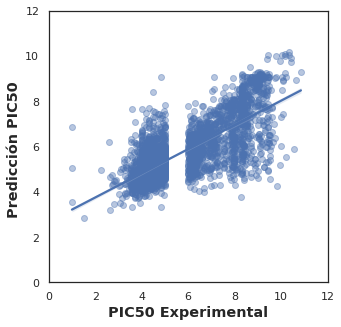

In [318]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('PIC50 Experimental', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicción PIC50 ', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

In [319]:
! unzip padel.zip -y

Archive:  padel.zip
caution: filename not matched:  -y


##Implementar Segundos descriptores

In [320]:
!pip install rdkit-pypi
!pip install mordred

from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

# https://pandas.pydata.org
import pandas as pd

# https://numpy.org/doc/stable/release.html
import numpy as np

#https://github.com/mordred-descriptor/mordred
from mordred import Calculator, descriptors


def RDkit_descriptors(smiles):
    mols = [Chem.MolFromSmiles(i) for i in smiles] 
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    desc_names = calc.GetDescriptorNames()
    
    Mol_descriptors =[]
    for mol in mols:
        # add hydrogens to molecules
        mol=Chem.AddHs(mol)
        # Calculate all 200 descriptors for each molecule
        descriptors = calc.CalcDescriptors(mol)
        Mol_descriptors.append(descriptors)
    return Mol_descriptors,desc_names 

# Function call
Mol_descriptors,desc_names = RDkit_descriptors(df3_selection['canonical_smiles'])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


KeyboardInterrupt: ignored

In [ ]:
df_with_200_descriptors = pd.DataFrame(Mol_descriptors,columns=desc_names)
df_with_200_descriptors

In [321]:
def morgan_fpts(data):
    Morgan_fpts = []
    for i in data:
        mol = Chem.MolFromSmiles(i) 
        fpts =  AllChem.GetMorganFingerprintAsBitVect(mol,2,2048)
        mfpts = np.array(fpts)
        Morgan_fpts.append(mfpts)  
    return np.array(Morgan_fpts)

In [322]:
Morgan_fpts = morgan_fpts(df3_selection['canonical_smiles'])
Morgan_fpts.shape

(15060, 2048)

In [323]:
Morgan_fingerprints = pd.DataFrame(Morgan_fpts,columns=['Col_{}'.format(i) for i in range(Morgan_fpts.shape[1])])
Morgan_fingerprints

,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,...,Col_2038,Col_2039,Col_2040,Col_2041,Col_2042,Col_2043,Col_2044,Col_2045,Col_2046,Col_2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15056,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15057,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15058,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [324]:
Morgan_fingerprints.to_csv('Morgan_fingerprints_reutilizacion_1.csv', index=False)

In [325]:
dataset5 = pd.concat([Morgan_fingerprints,df3_Y], axis=1)
dataset5

,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,...,Col_2039,Col_2040,Col_2041,Col_2042,Col_2043,Col_2044,Col_2045,Col_2046,Col_2047,pIC50
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.301030
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.000000
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.000000
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,5.000000
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.540608
15056,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.832683
15057,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.219683
15058,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.540608


In [326]:
dataset5.to_csv('reutilizacion_07_bioactivity_data_3class_pIC50_pubchem_fp_1.csv', index=False)

In [327]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [328]:
df4 = pd.read_csv('reutilizacion_07_bioactivity_data_3class_pIC50_pubchem_fp_1.csv')

In [329]:
X4 = df4.drop('pIC50', axis=1)
X4

,Col_0,Col_1,Col_2,Col_3,Col_4,Col_5,Col_6,Col_7,Col_8,Col_9,...,Col_2038,Col_2039,Col_2040,Col_2041,Col_2042,Col_2043,Col_2044,Col_2045,Col_2046,Col_2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15056,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15057,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15058,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [330]:
Y4 = df4.pIC50
Y4

0        7.301030
1        5.000000
2        4.000000
3        5.000000
4        6.000000
           ...   
15055    4.540608
15056    4.832683
15057    4.219683
15058    4.540608
15059    4.294992
Name: pIC50, Length: 15060, dtype: float64

In [331]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X4 = selection.fit_transform(X4)

In [332]:
#resultado
X4.shape
X4

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 1, 0],
       [0, 1, 1, ..., 0, 0, 0]])

In [333]:
#dividir conjunto de datos 80/20
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X4_train, X4_test, Y4_train, Y4_test = train_test_split(X4, Y4, test_size=0.2,random_state=10)

In [334]:
model = RandomForestRegressor(n_estimators=60, max_depth=14, random_state=0,  min_samples_split=4)
model.fit(X4_train, Y4_train)
r2 = model.score(X4_test, Y4_test)
r2

0.3959365848793047

In [203]:
def All_Mordred_descriptors(data):
    calc = Calculator(descriptors, ignore_3D=False)
    mols = [Chem.MolFromSmiles(smi) for smi in data]
    
    # pandas df
    df = calc.pandas(mols)
    return df

In [ ]:
mordred_descriptors = All_Mordred_descriptors(df3_selection['canonical_smiles'])

In [ ]:
mordred_descriptors.to_csv('mordred_descriptors_reutilizacion.csv', index = False)